# Classification: Performance of the Naive Bayes algorithm on the given data set
Run theNaive Bayes tool on the resulting version of **`train_gr_smpl`**. To be able to do this in Weka, you may
need to apply several Weka “Filters”. Explain the reason for choosing and using these filters. Once
you can run the algorithm, record, compare and analyse the classifier’s accuracy on different classes
(as given by the confusion matrix).

### Proportional k-interval discretization
 According to the course textbook Equal Frequency binning is excellent for Naive bayes.
 
 **Specifically when the number of bins is equal to the sqaure root of the number of instances.** This is called Proportional k-interval discretization

* Preprocess (filter the data) data
    * normalize the data filter
    * Scipy / Keras maybe
    * Justify how / why 
* 

In [91]:
import helperfn

test = helperfn.get_random_data('x_train_gr_smpl.csv')
test

(          0      1      2      3      4      5      6      7      8      9  \
 239   255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 3715  246.0  242.0  246.0  244.0  246.0  248.0  249.0  248.0  248.0  248.0   
 5631   19.0   23.0   27.0   26.0   24.0   22.0   22.0   26.0   25.0   24.0   
 5059  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 5498   24.0   24.0   24.0   24.0   24.0   25.0   25.0   26.0   27.0   26.0   
 ...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 6942   14.0   14.0   14.0   13.0   13.0   12.0   11.0   11.0   11.0   10.0   
 9509  171.0  212.0  121.0  178.0  253.0  255.0  255.0  255.0  255.0  255.0   
 9582   33.0   34.0   35.0   36.0   36.0   34.0   32.0   31.0   33.0   34.0   
 7332   36.0   39.0   38.0   34.0   32.0   32.0   33.0   34.0   33.0   32.0   
 329    61.0   60.0   60.0   60.0   59.0   61.0   61.0   64.0   69.0   73.0   
 
       ...   2294   2295   2296   2297   2298   22

In [92]:
test.dtypes
data = test.to_numpy()
data[0]

AttributeError: 'tuple' object has no attribute 'dtypes'

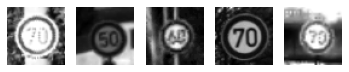

In [24]:
import matplotlib.pyplot as plt

num_images = 5

for i in range(num_images):
    row = data[i]
    image = row.reshape(48,48)
    plt.subplot(1, num_images, i+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

Scores for dataset:  -1
Training data score:  0.23271413828689372
Testing data score:  0.21465428276573786
--------------------------------------
Scores for dataset:  0
Training data score:  0.23271413828689372
Testing data score:  0.21465428276573786
--------------------------------------
Scores for dataset:  1
Training data score:  0.23271413828689372
Testing data score:  0.21465428276573786
--------------------------------------
Scores for dataset:  2
Training data score:  0.9784571723426213
Testing data score:  0.97781217750258
--------------------------------------
Scores for dataset:  3
Training data score:  0.7672858617131063
Testing data score:  0.7853457172342622
--------------------------------------
Scores for dataset:  4
Training data score:  0.7689628482972136
Testing data score:  0.7631578947368421
--------------------------------------
Scores for dataset:  5
Training data score:  0.8547471620227038
Testing data score:  0.8534571723426213
---------------------------------

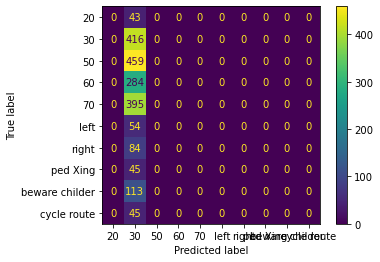

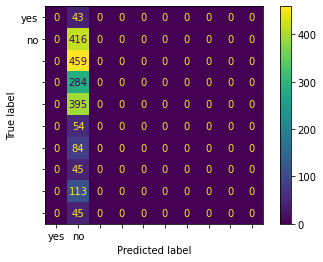

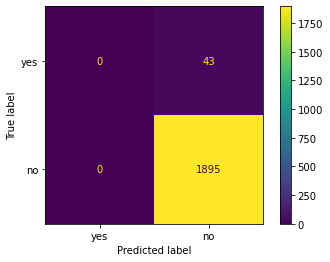

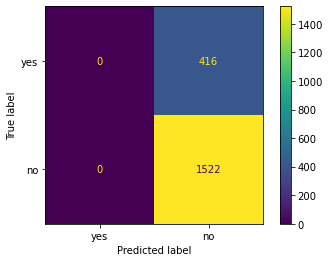

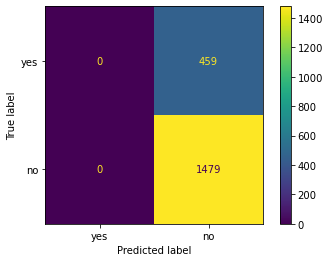

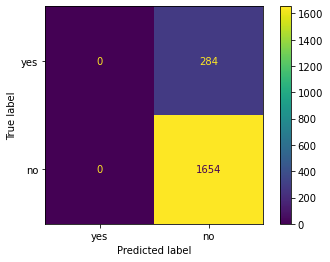

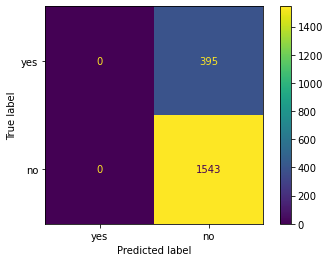

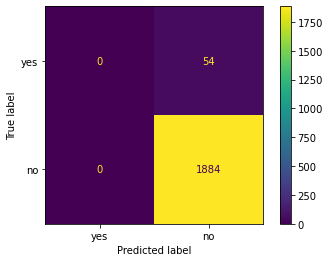

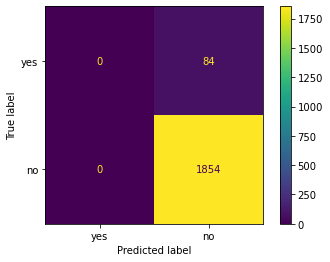

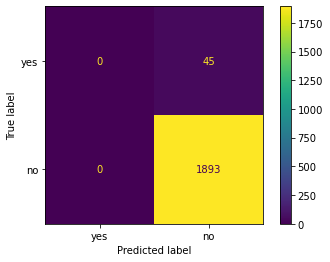

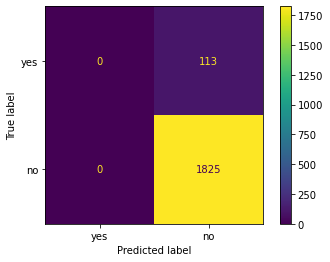

In [1]:
import NaiveBayseBernoulli
%load_ext autoreload
%autoreload 2

classifiers, scores, train_test_data = NaiveBayseBernoulli.build_nbc_models()
confusionMatrixArr = NaiveBayseBernoulli.build_confusion_matrix(classifiers, train_test_data)
NaiveBayseBernoulli.show_confusion_matrix(confusionMatrixArr)






In [13]:
import NaiveBayseBernoulli


true , false = NaiveBayseBernoulli.countRates(2)
print("True: ", true)
print("False: ", false)

True:  2250
False: 7440
